In [1]:
import pandas as pd
import numpy as np
import algos.shallow_nn as shallow_nn
import algos.logistic_regression as logistic_regression
import algos.deep_nn as deep_nn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("datasets/heart/heart.csv")
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
2,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
4,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


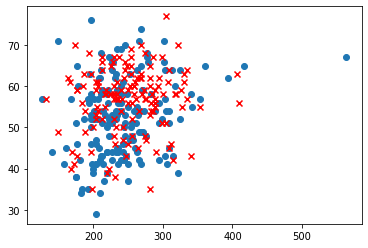

In [3]:
plt.scatter(data[data.target == 1]["chol"], data[data.target == 1]["age"], marker="o")

plt.scatter(data[data.target == 0]["chol"], data[data.target == 0]["age"], marker="x", color="red")

In [4]:
y = data["target"]

features = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
X = pd.get_dummies(data[features])

y = np.array([y]).T
X = np.array(X)

X_train = X[:(int(len(X)*0.75)), :].T
X_val = X[(int(len(X)*0.75)):, :].T
y_train = y[:(int(len(X)*0.75)), :].T
y_val = y[(int(len(X)*0.75)):, :].T


In [5]:
y_train.shape

(1, 227)

In [6]:
snn_model = shallow_nn.model(X_train, y_train, X_val, y_val, n_h = 5, num_iterations=5000, learning_rate=0.0015, print_cost=True)

Cost after iteration 0: 0.693163
Cost after iteration 500: 0.690245
Cost after iteration 1000: 0.688240
Cost after iteration 1500: 0.686861
Cost after iteration 2000: 0.685913
Cost after iteration 2500: 0.685259
Cost after iteration 3000: 0.684809
Cost after iteration 3500: 0.684499
Cost after iteration 4000: 0.684285
Cost after iteration 4500: 0.684138
Cost after iteration 4999: 0.684036
train accuracy: 56.82819383259912 %
test accuracy: 47.36842105263158 %


In [7]:
layer_dims = [13, 10, 7, 5, 1]

nn_model = deep_nn.model(X_train, y_train, X_val, y_val, layers_dims=layer_dims, learning_rate=0.1, print_cost = True)

Cost after iteration 0: 0.6936965593399295
Cost after iteration 300: 0.6837931347597165
Cost after iteration 600: 0.6837931317000303
Cost after iteration 900: 0.6837931317000293
Cost after iteration 1200: 0.6837931317000293
Cost after iteration 1500: 0.6837931317000293
Cost after iteration 1800: 0.6837931317000293
Cost after iteration 2100: 0.6837931317000293
Cost after iteration 2400: 0.6837931317000293
Cost after iteration 2700: 0.6837931317000293
Cost after iteration 2999: 0.6837931317000293
train accuracy: 56.82819383259912 %
test accuracy: 47.36842105263158 %
